### Simple Linear Regression

Simple Linear Regression is a statistical method used to model the relationship between a single predictor (independent variable, x) and a quantitative response (dependent variable, y). The goal is to find the best-fitting line that represents a linear relationship between these two variables. 

The following code outlines how to do so. 

In [179]:
import pandas as pd 

df = pd.read_csv('/Users/muhammadmuhdhar/Desktop/Repo/ml-algorithms-from-scratch/HousingData.csv')
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
104,0.13960,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,20.1
413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5,403,14.7,396.90,26.42,15.6
338,0.03306,0.0,5.19,0.0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51,20.6
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5,358,14.8,368.24,4.97,22.5
217,0.07013,0.0,13.89,0.0,0.550,6.642,85.1,3.4211,5,276,16.4,392.78,9.69,28.7
325,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8


<function matplotlib.pyplot.show(close=None, block=None)>

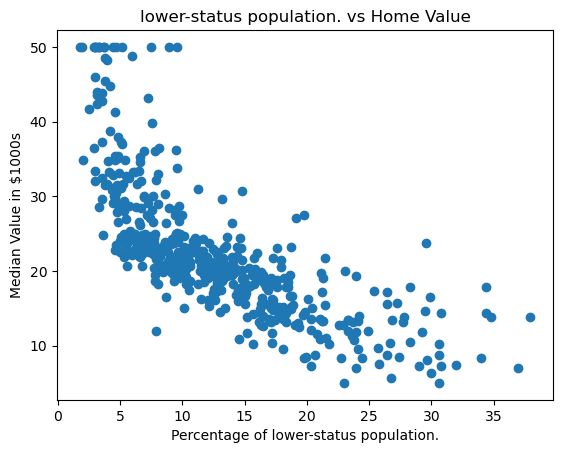

In [180]:
# plotting variables with a linear relationship

import matplotlib.pyplot as plt

plt.scatter(df.LSTAT, df.MEDV)
plt.title("lower-status population. vs Home Value")
plt.xlabel('Percentage of lower-status population.')
plt.ylabel("Median Value in $1000s")
plt.show

In [182]:
X = df['LSTAT'] # Indepedent Variable
y = df['MEDV'] # Depedent Variable

### Least Squares Method

The relationship between $x$ and $y$ is modeled by the following linear equation:

$\hat{y} = {\beta_0} + {\beta_1}{x}$ 

How the Formula Works:

1. ${\beta_0}$: This is the *intercept* of the regression line, which represents the predicted value of $y$ when the independent variable $x$ is zero. In the context of the regression line, it shows where the line crosses the y-axis.

2. ${\beta_1}$ : This is the *slope* of the regression line. It indicates the change in the predicted value of $y$ for a one-unit change in $x$. The slope determines the steepness and direction of the line


The main objective of simple linear regression is to find the line that best fits the data points. This is done using the *least squares method*, which minimizes the sum of the squared differences between the observed values and the predicted values. These differences are known as *residuals*. The formula can be broken down into these steps:

1. **Calculate the Slope $\beta_1$:**
   
   - The formula for the slope $\beta_1$ is:
     
     $
     \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
     $
     - **Numerator:** Measures how the deviations of $x$ from its mean $\bar{x}$ correlate with the deviations of $y$ from its mean $\bar{y}$. This is the *covariance* between $x$ and $y$.
     - **Denominator:** Measures the total variation in $x$ values, known as the *variance* of $x$. It captures how spread out the $x$ values are.




In [183]:
import numpy as np
X_mean = np.mean(X)
y_mean = np.mean(y)

numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)

beta_1 = numerator / denominator

beta_1 # slope of best fit line 

-0.9468591342663238

2. **Calculate the Intercept $\beta_0$:**
   - Once the slope $\beta_1$ is found, the intercept $\beta_0$ is calculated using:
    
     $
     \beta_0 = \bar{y} - \beta_1 \bar{x}
     $


In [184]:
beta_0 = y_mean - beta_1 * X_mean
beta_0

34.57252935296994

Now that we have the two beta coefficients, we can use them in the formula to predict the value of $\hat{y}$:

$\hat{y} = {\beta_0} + {\beta_1}{x}$ 

In [185]:
y_pred = beta_0 + beta_1 * X

y_pred

0      29.857171
1      25.918237
2      30.756687
3      31.788763
4            NaN
         ...    
501          NaN
502    25.975048
503    29.232244
504    28.436882
505    27.111279
Name: LSTAT, Length: 506, dtype: float64

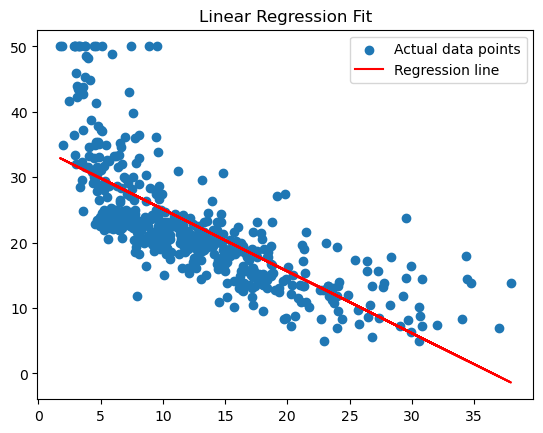

In [186]:
plt.scatter(X, y, label='Actual data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

### Sum of Squares

Sum of sqaures is a measure of dispersion, it measures how a data set varies around a central number (such as the mean).

**Explained Sum of Sqaures (ESS)**

The ESS measures the variation in the dependent variable that is explained by the model. It tells you how much of the total variation is captured by your model.

The formula is:

$ESS = \sum_{i=1}^{n}(\hat{y_i}  -  \bar{y})^2$

The ESS is always non-negative and ranges from 0 to the total variation. A higher ESS indicates that the model explains more of the variation in the data.

**Residul Sum of Squares (RSS)**

RSS evaluates the model's performance by measuring the discrepancy between the observed values and the predicted values. It is calculated as the sum of the squared differences between the actual and predicted values:

$RSS = \sum_{i=1}^{n}({y_i} - \hat{y_i})^2$

A lower RSS suggests a better model fit, while a higher RSS indicates a poor fit. A perfect model fit would result in an RSS of zero.

**Total Sum of Squares (TSS)** 

TSS measures the total variation in the dependent variable. It tells you how much the observed data varies from the mean.

$TSS =\sum_{i=1}^{n}({y_i} - \bar{y})^2 = ESS + RSS$

A higher TSS indicates greater variability in the dependent variable.

In [187]:
ESS = np.sum((y_pred - np.mean(y)) ** 2)
ESS

22265.757164866634

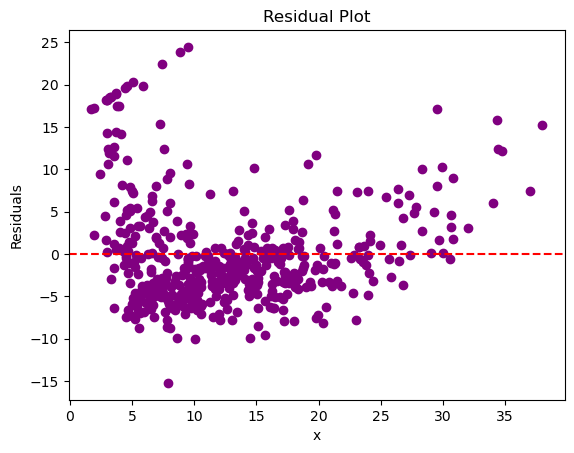

In [188]:
residuals = y - y_pred

plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [189]:
RSS = np.sum((y - y_pred) ** 2)

RSS


18861.21715983771

In [190]:
TSS = ESS + RSS
TSS

41126.974324704344

### R-Squared (Coefficient of Determination)

R-Squared, also known as the coefficient of determination, is a statistical measure that indicates the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. In other words, it reflects how well the regression model fits the observed data, or the model's "goodness of fit."

It can be calculated as:

${R}^2 = 1- \frac{RSS}{TSS} = \frac{ESS}{TSS}$

A higher R-Squared value (closer to 1) means the model explains a greater portion of the variance, indicating a better fit.

In [191]:
r_squared=(ESS / TSS)
r_squared

0.5413905965723312

### Residual Standard Error (RSE)

Residual Standard Error *(RSE)* is a measure of the typical distance between the observed values and the regression line. It gives us an idea of the average error made by the regression model in predicting the response variable.

**Formula for RSE**

The formula for calculating the RSE is:

$
{RSE} = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - 2}} = \sqrt{\frac{RSS}{n - 2}}
$


The RSE indicates the typical size of the residuals; the closer it is to 0, the better the model's fit.




In [192]:
RSE = np.sqrt(RSS/(len(X)-2))
RSE

6.117438182794569

### Mean Squared Error (MSE)

The Mean Squared Error is a common measure used to evaluate the performance of a regression model. It represents the average of the squared differences between the actual and predicted values, providing insight into the model’s overall accuracy.

The formula to calculate MSE is: 

$
MSE = {\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n }} = {\frac{RSS}{n}}
$

A lower MSE indicates a model that predicts values closer to the actual observations, signaling a better fit. Because MSE squares the errors, it places greater emphasis on larger deviations from the regression line, making it more sensitive to outliers compared to RSE.

In [193]:
MSE = RSS/len(X)

MSE

37.275132726951995

### Confidence Interval 

SE is used to determine standard error of the estimated coefficients. These standard errors measure the uncertainty in our estimates, allowing us to construct confidence intervals for the true values of these coefficients.

It can be calculated as: 

$
SE(\beta_1) = \sqrt\frac{\frac{1}{n-2}\sum({y_i} - \hat{y_i})^2}{\sum({x_i} - \bar{x_i})^2} = \frac{RSE}{\sqrt{\sum({x_i} - \bar{x_i})^2}}
$

**Confidence Interval for the Slope $\beta_1$**

The formula for a 95% confidence interval for the slope $\beta_1$ is:

$
\beta_1 \pm 1.96 \times SE(\beta_1)
$


**Interpretation of Confidence Intervals**

A 95% confidence interval means that if we were to sample data and fit the linear regression model many times, approximately 95% of those intervals would contain the true value of the coefficient. Narrower confidence intervals indicate more precise estimates of the coefficients.




In [194]:
SE_b1 = RSE/ np.sqrt(np.sum((X - X_mean) ** 2))
SE_b1

0.03881827465101879

In [195]:
high_slope_confidence = beta_1 + 1.96 * SE_b1
low_slope_confidence= beta_1 - 1.96 * SE_b1

print(f'For each one-unit increase in X, y is expected to increase by somewhere between {high_slope_confidence} and {low_slope_confidence} points')


For each one-unit increase in X, y is expected to increase by somewhere between -0.870775315950327 and -1.0229429525823206 points


### Hypothesis testing

The Standard Error of the slope ${\beta_1}$ is crucial in hypothesis testing for regression analysis because it quantifies the uncertainty in the estimate of the slope. This uncertainty is used to construct a t-statistic for testing hypotheses about the slope, most commonly to determine whether the slope is significantly different from zero.

- Null Hypothesis $(H_0)$: The slope ${\beta_1 =0}$, meaning that there is no relationship between the predictor and the response variable (the predictor has no effect on the response).
- Alternative Hypothesis $(H_A)$: The slope  ${\beta_1 \neq 0}$ meaning there is a statistically significant relationship between the predictor and the response variable.

This t-statistic measures how many standard errors the estimated slope is away from the null hypothesis value of zero. The larger the t-statistic, the more evidence we have against the null hypothesis.

$
{t} = \frac{{\beta_1}}{SE{\beta_1}}
$

In [196]:
t_stat = beta_1/ SE_b1
t_stat

-24.392097350505853